<a href="https://colab.research.google.com/github/NataliiaPyrih/University-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ИАД/Daegu_Real_Estate_data.csv')
df.head()

Mounted at /content/drive


,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

316

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
for col in [col for col in df.columns if df[col].dtype=='float64']:
  df[col] = df[col].astype('int')
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111,...,1,1,0,3,2,2,2,5,6,9
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80,...,1,2,1,2,1,1,0,3,12,4
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80,...,1,2,1,2,1,1,0,3,12,4
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249,...,1,0,0,2,2,1,2,5,3,7
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523,...,1,5,0,4,3,5,5,4,14,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SalePrice                           5575 non-null   int64 
 1   YearBuilt                           5575 non-null   int64 
 2   YrSold                              5575 non-null   int64 
 3   MonthSold                           5575 non-null   int64 
 4   Size(sqf)                           5575 non-null   int64 
 5   Floor                               5575 non-null   int64 
 6   HallwayType                         5575 non-null   object
 7   HeatingType                         5575 non-null   object
 8   AptManageType                       5575 non-null   object
 9   N_Parkinglot(Ground)                5575 non-null   int64 
 10  N_Parkinglot(Basement)              5575 non-null   int64 
 11  TimeToBusStop                       5575 non-null   obje

<Axes: xlabel='YrSold', ylabel='SalePrice'>

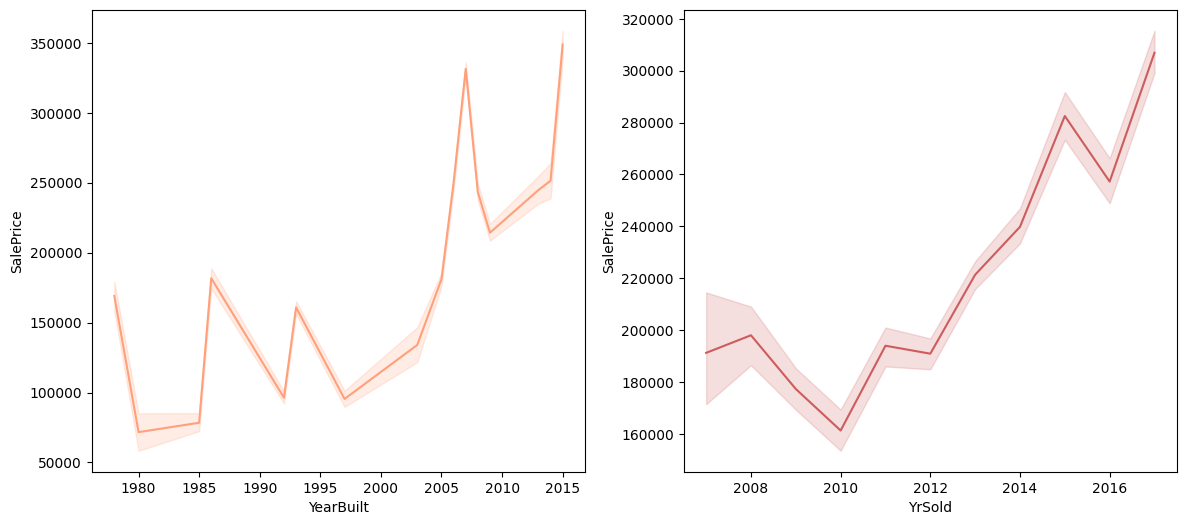

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(data=df, x='YearBuilt', y='SalePrice', ax=axs[0], c='lightsalmon')
sns.lineplot(data=df, x='YrSold', y='SalePrice', ax=axs[1], c='indianred')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-5min'),
  Text(1, 0, '5min~10min'),
  Text(2, 0, '10min~15min'),
  Text(3, 0, '15min~20min'),
  Text(4, 0, 'no_bus_stop_nearby')])

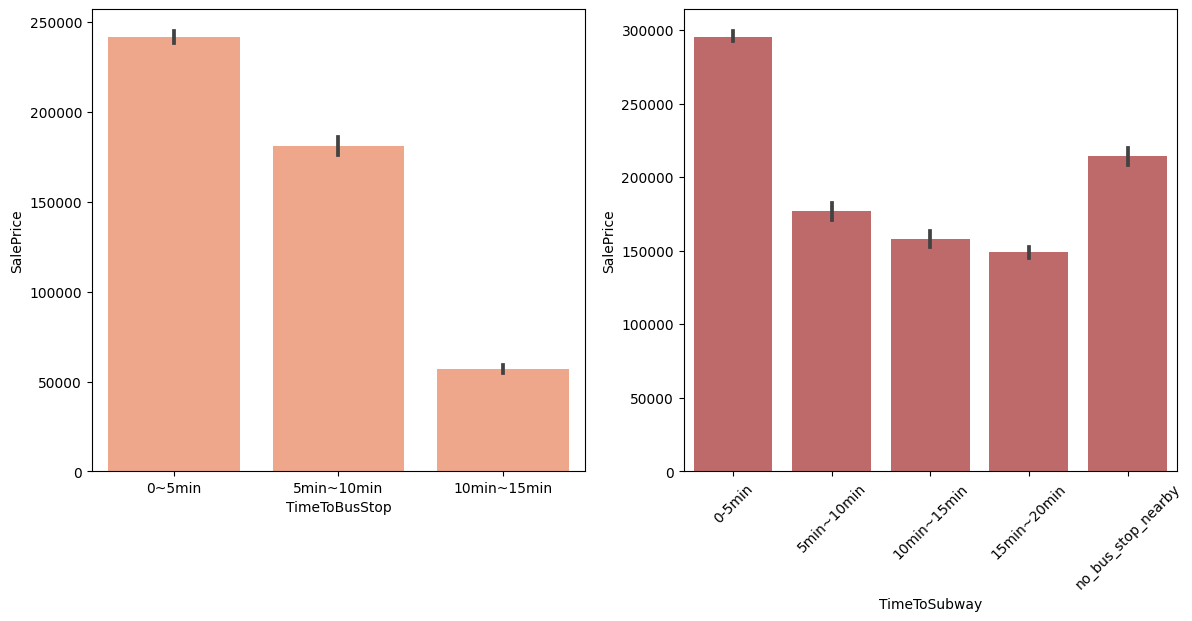

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=df, x='TimeToBusStop', y='SalePrice', ax=axs[0], color='lightsalmon', order=['0~5min', '5min~10min', '10min~15min'])
sns.barplot(data=df, x='TimeToSubway', y='SalePrice', ax=axs[1], color='indianred', order=['0-5min', '5min~10min', '10min~15min', '15min~20min', 'no_bus_stop_nearby'])
plt.xticks(rotation=45)

<Axes: xlabel='HeatingType', ylabel='SalePrice'>

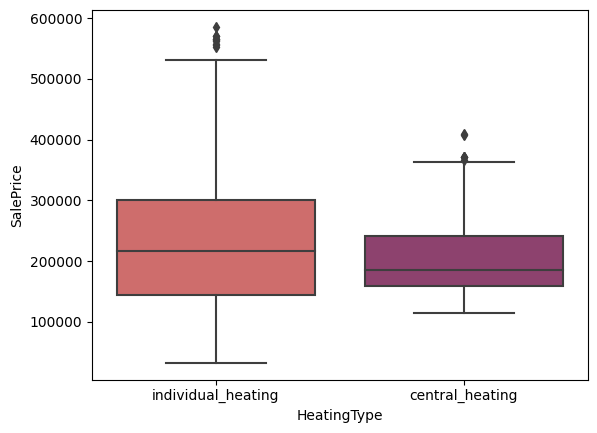

In [ ]:
sns.boxplot(data=df, x='HeatingType', y='SalePrice', palette='flare')

<Axes: xlabel='N_FacilitiesNearBy(Total)', ylabel='SalePrice'>

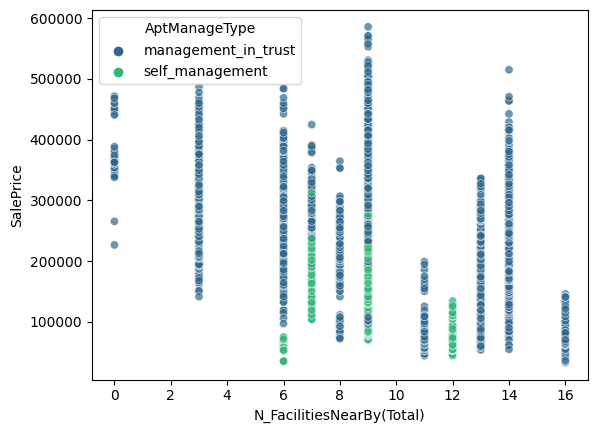

In [ ]:
sns.scatterplot(x='N_FacilitiesNearBy(Total)', y='SalePrice', data=df, hue='AptManageType', palette='viridis', alpha=0.7)

In [ ]:
df.to_csv('/content/drive/MyDrive/ИАД/Daegu_Real_Estate_data_cleaned.csv')

In [ ]:
categorical_columns = [col for col in df.columns if df[col].dtype=='object']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,2,1,0,111,...,1,1,0,3,2,2,2,5,6,9
1,51327,1985,2007,8,587,8,0,1,1,80,...,1,2,1,2,1,1,0,3,12,4
2,48672,1985,2007,8,587,6,0,1,1,80,...,1,2,1,2,1,1,0,3,12,4
3,380530,2006,2007,8,2056,8,2,1,0,249,...,1,0,0,2,2,1,2,5,3,7
4,221238,1993,2007,8,1761,3,1,1,0,523,...,1,5,0,4,3,5,5,4,14,17


In [ ]:
df.to_csv('/content/drive/MyDrive/ИАД/Daegu_Real_Estate_data_encoded.csv')

<Axes: >

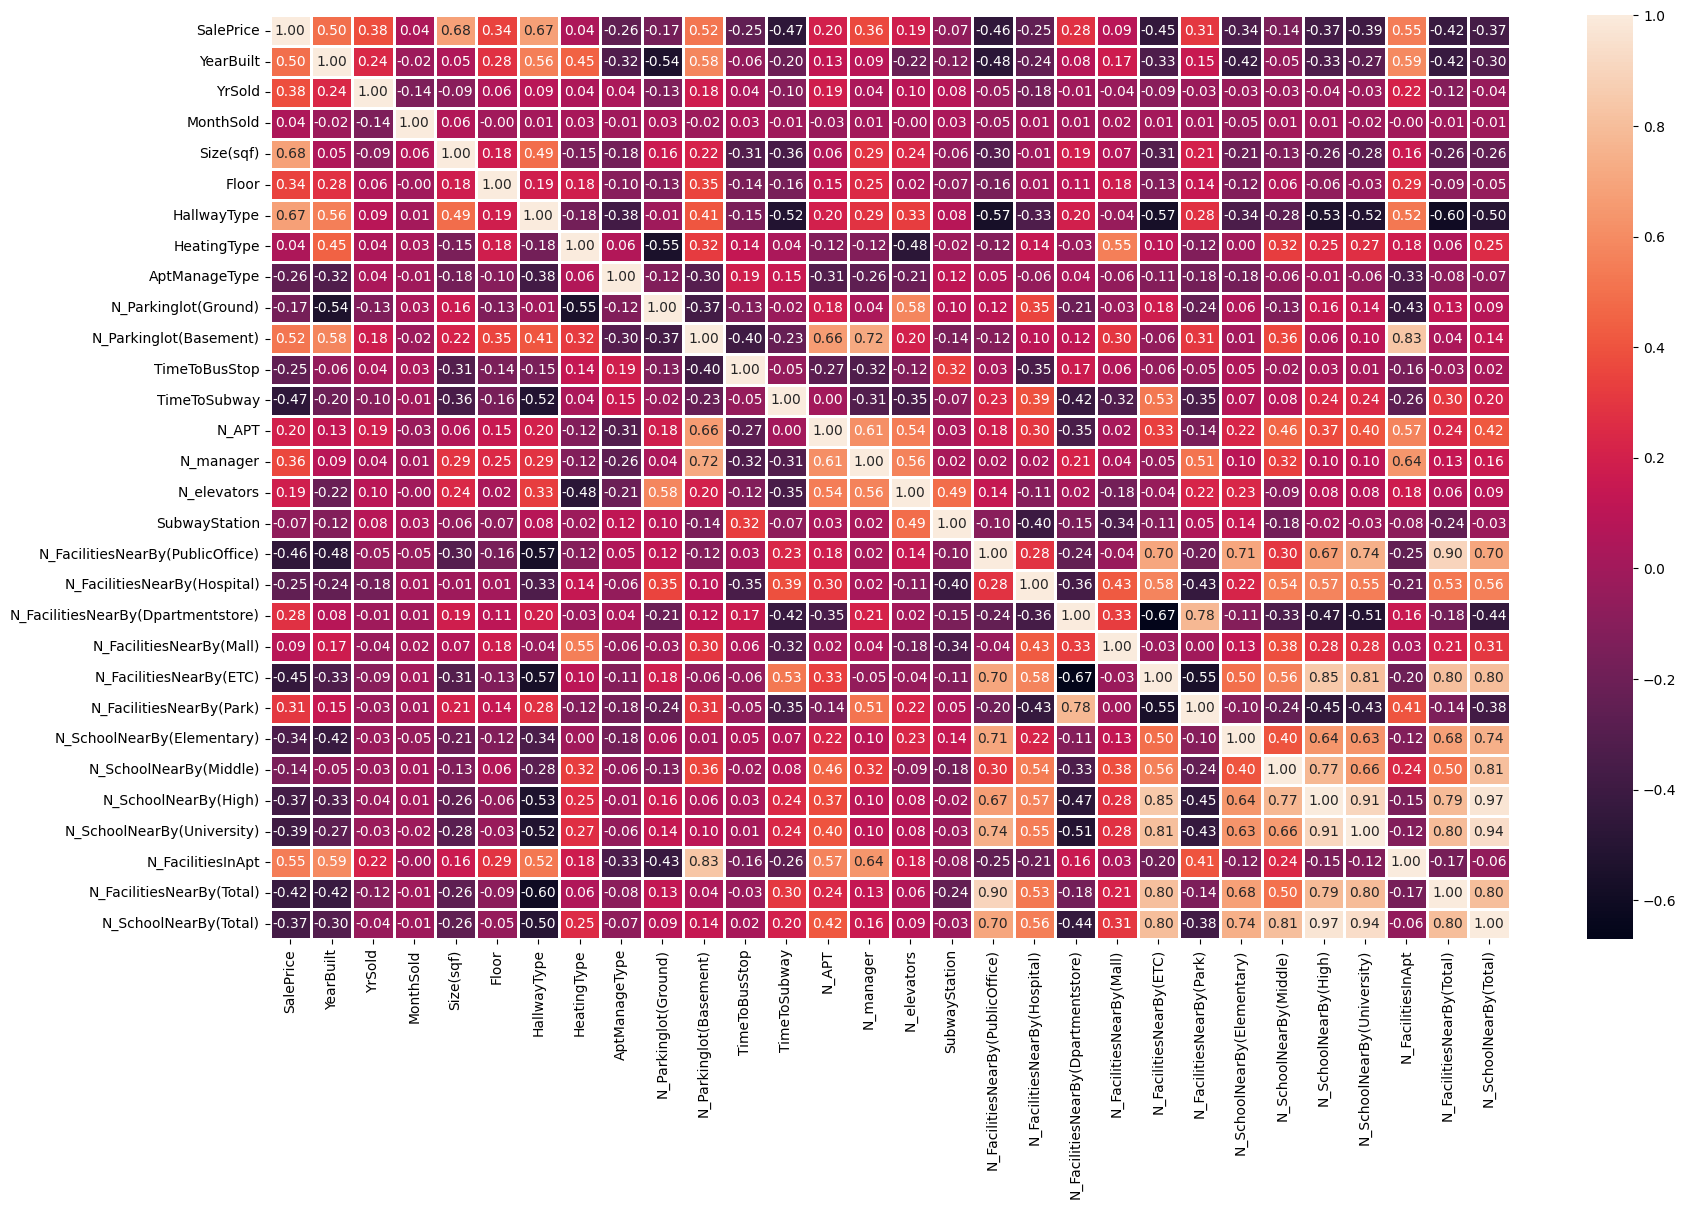

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f')

In [ ]:
df.corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice                             1.000000
Size(sqf)                             0.684716
HallwayType                           0.673877
N_FacilitiesInApt                     0.545474
N_Parkinglot(Basement)                0.523179
YearBuilt                             0.497262
YrSold                                0.382468
N_manager                             0.364361
Floor                                 0.344081
N_FacilitiesNearBy(Park)              0.308057
N_FacilitiesNearBy(Dpartmentstore)    0.279056
N_APT                                 0.201098
N_elevators                           0.190452
N_FacilitiesNearBy(Mall)              0.087024
HeatingType                           0.044869
MonthSold                             0.044263
SubwayStation                        -0.067709
N_SchoolNearBy(Middle)               -0.144274
N_Parkinglot(Ground)                 -0.170026
N_FacilitiesNearBy(Hospital)         -0.249438
TimeToBusStop                        -0.251990
AptManageType

In [ ]:
X = df.drop(['SalePrice'], axis=1).values
y = df['SalePrice'].values.ravel()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38398809, -1.96340076,  0.504727  , ..., -0.32040593,
        -1.09912958, -0.40320207],
       [-1.98720267, -1.96340076,  0.504727  , ..., -1.16238711,
         0.61091156, -1.51248528],
       [-1.98720267, -1.96340076,  0.504727  , ..., -1.16238711,
         0.61091156, -1.51248528],
       ...,
       [ 0.49690194,  1.49350906,  0.504727  , ...,  1.78454702,
        -0.24410901, -0.18134542],
       [-2.77759959,  1.49350906,  0.504727  , ..., -1.16238711,
        -0.81412272,  0.04051122],
       [ 0.49690194,  1.49350906,  0.504727  , ...,  1.78454702,
        -0.24410901, -0.18134542]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=121, train_size=.3)

In [ ]:
models = {'LinearRegressor': LinearRegression(), 'DecisionTreeRegressor': DecisionTreeRegressor(), 'GradientBoostingRegressor': GradientBoostingRegressor(), 'Ridge': Ridge()}

for model in models.values():
  model.fit(X_train, y_train)

In [ ]:
models_test_pred = {}
models_train_pred = {}

def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    models_test_pred[name] = y_pred
    models_train_pred[name] = model.predict(X_train)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

for name, model in models.items():
  mse, mae, r2 = evaluate_model(model, name, X_test, y_test)
  print(f'{name} MSE: {mse}')
  print(f'{name} MAE: {mae}')
  print(f'{name} R2: {r2}\n')

LinearRegressor MSE: 1336575793.391658
LinearRegressor MAE: 26281.2512287058
LinearRegressor R2: 0.8843429265136082

DecisionTreeRegressor MSE: 569095243.425846
DecisionTreeRegressor MAE: 15253.192352036895
DecisionTreeRegressor R2: 0.9507548388089265

GradientBoostingRegressor MSE: 393194684.5095247
GradientBoostingRegressor MAE: 14242.650832361163
GradientBoostingRegressor R2: 0.9659759313720783

Ridge MSE: 1336259688.3446639
Ridge MAE: 26215.50722913161
Ridge R2: 0.8843702798330612



[Text(0.5, 1.0, 'GradientBoostingRegressor')]

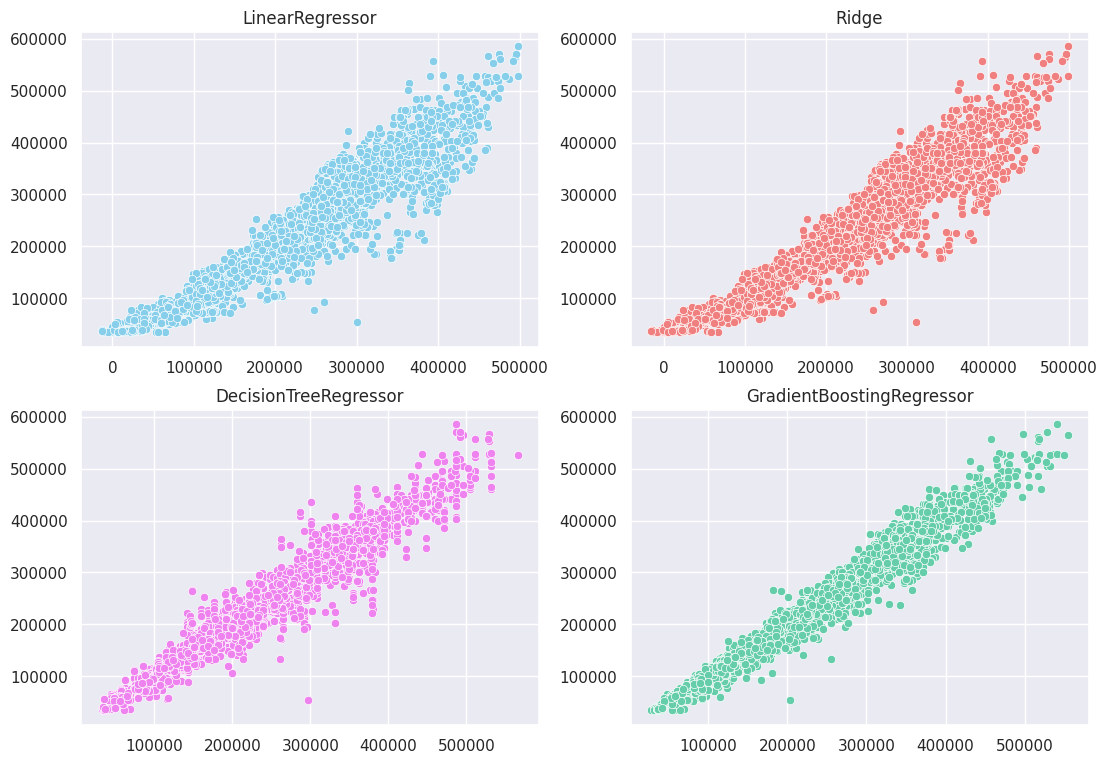

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(13, 9))
sns.scatterplot(x=models_test_pred['LinearRegressor'], y=y_test, color="skyblue", ax=axs[0, 0]).set(title='LinearRegressor')
sns.scatterplot(x=models_test_pred['Ridge'], y=y_test, color="lightcoral", ax=axs[0, 1]).set(title='Ridge')
sns.scatterplot(x=models_test_pred['DecisionTreeRegressor'], y=y_test, color="violet", ax=axs[1, 0]).set(title='DecisionTreeRegressor')
sns.scatterplot(x=models_test_pred['GradientBoostingRegressor'], y=y_test, color="mediumaquamarine", ax=axs[1, 1]).set(title='GradientBoostingRegressor')

<Axes: title={'center': 'GradientBoostingRegressor'}>

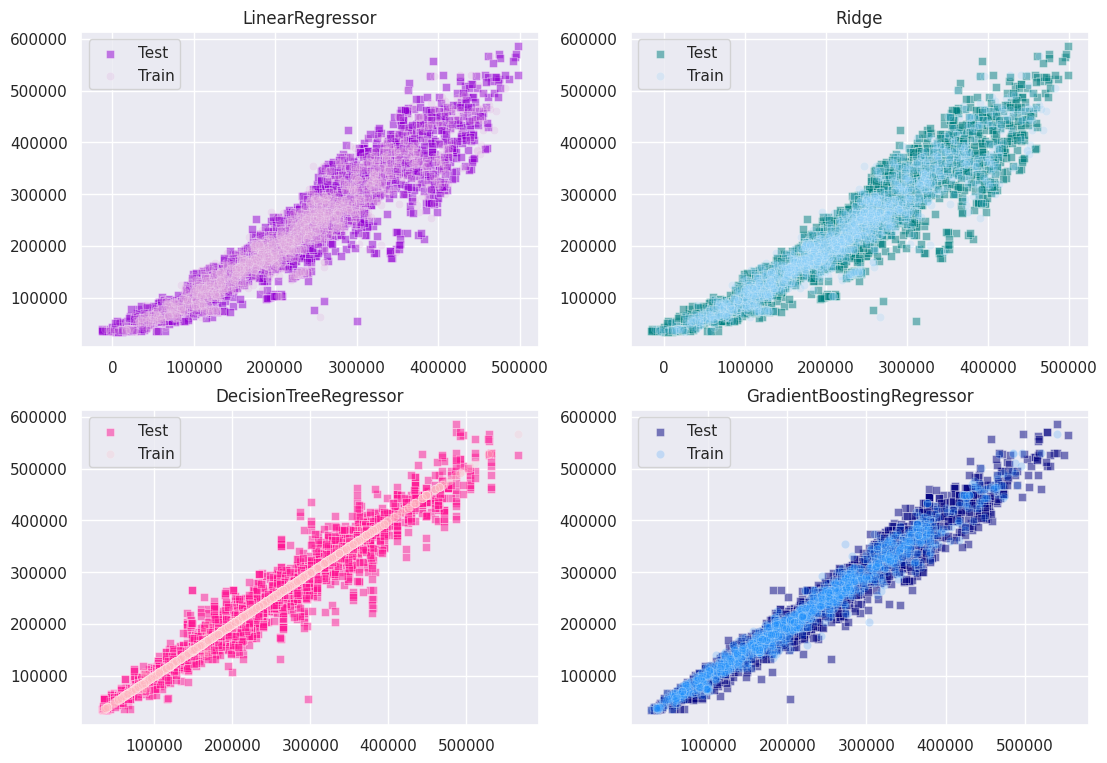

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(13, 9))
sns.scatterplot(x=models_test_pred['LinearRegressor'], y=y_test, c='darkviolet', marker='s', alpha=0.5, ax=axs[0, 0], label='Test').set(title='LinearRegressor')
sns.scatterplot(x=models_train_pred['LinearRegressor'], y=y_train, c='plum', marker='o', alpha=0.2, ax=axs[0, 0], label='Train')
sns.scatterplot(x=models_test_pred['Ridge'], y=y_test, c='teal', marker='s', alpha=0.5, ax=axs[0, 1], label='Test').set(title='Ridge')
sns.scatterplot(x=models_train_pred['Ridge'], y=y_train, c='lightskyblue', marker='o', alpha=0.2, ax=axs[0, 1], label='Train')
sns.scatterplot(x=models_test_pred['DecisionTreeRegressor'], y=y_test, c='deeppink', marker='s', alpha=0.5, ax=axs[1, 0], label='Test').set(title='DecisionTreeRegressor')
sns.scatterplot(x=models_train_pred['DecisionTreeRegressor'], y=y_train, c='lightpink', marker='o', alpha=0.2, ax=axs[1, 0], label='Train')
sns.scatterplot(x=models_test_pred['GradientBoostingRegressor'], y=y_test, c='navy', marker='s', alpha=0.5, ax=axs[1, 1], label='Test').set(title='GradientBoostingRegressor')
sns.scatterplot(x=models_train_pred['GradientBoostingRegressor'], y=y_train, c='dodgerblue', marker='o', alpha=0.2, ax=axs[1, 1], label='Train')

Text(0.5, 0, 'Coefficient')

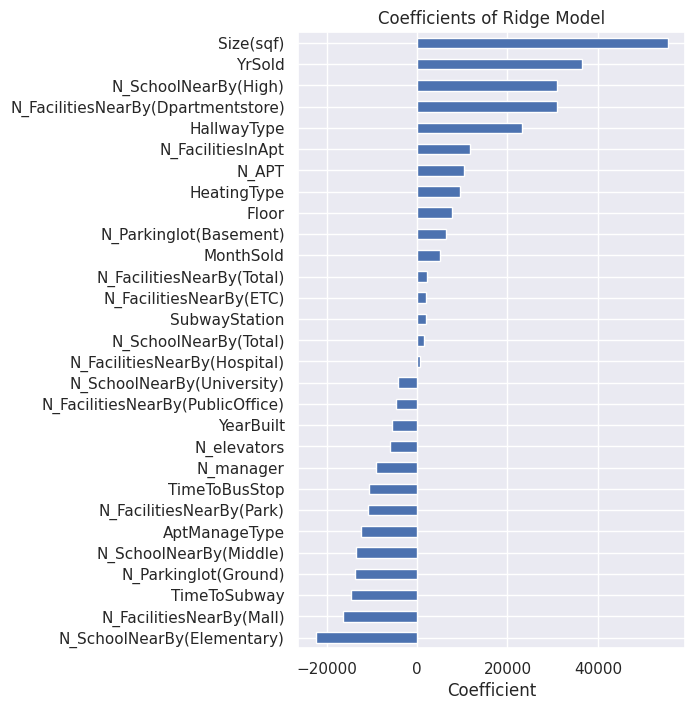

In [ ]:
coef_df = pd.Series(models['Ridge'].coef_, index=df.columns[1:])
fig, ax = plt.subplots(figsize=(5, 8))
coef_df.sort_values().plot(kind="barh")
plt.title("Coefficients of Ridge Model")
plt.xlabel("Coefficient")